In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime, date

In [2]:
os.getcwd()

'C:\\Users\\manth\\Learnbay Course Python\\Real_Time_Projects\\E-Commerce Domain'

In [3]:
dataset = pd.read_csv('E-com_Data.csv')
dataset.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


In [4]:
# Rename the column name
dataset = dataset.rename(columns={'InvoieNo' : 'Invoice No', 'Date of purchase':'Date'})

In [5]:
dataset.head(2)

,CustomerID,Item Code,Invoice No,Date,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541116 entries, 0 to 541115
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         404189 non-null  float64
 1   Item Code          537979 non-null  object 
 2   Invoice No         537979 non-null  float64
 3   Date               537979 non-null  object 
 4   Quantity           537979 non-null  float64
 5   Time               537979 non-null  object 
 6   price per Unit     537979 non-null  float64
 7   Price              537979 non-null  float64
 8   Shipping Location  537979 non-null  object 
 9   Cancelled_status   8345 non-null    object 
 10  Reason of return   3 non-null       object 
 11  Sold as set        0 non-null       float64
dtypes: float64(6), object(6)
memory usage: 49.5+ MB


In [7]:
dataset.isnull().sum()/len(dataset)*100

CustomerID            25.304556
Item Code              0.579728
Invoice No             0.579728
Date                   0.579728
Quantity               0.579728
Time                   0.579728
price per Unit         0.579728
Price                  0.579728
Shipping Location      0.579728
Cancelled_status      98.457817
Reason of return      99.999446
Sold as set          100.000000
dtype: float64

In [8]:
dataset['CustomerID'].nunique()

4349

In [9]:
dataset.duplicated().sum()

3145

In [10]:
dataset.loc[dataset.duplicated(),:]

,CustomerID,Item Code,Invoice No,Date,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
61202,4043.0,15819,403353.0,02-12-2017,1.0,2:07:00 PM,447.0,447.0,Location 36,NaN,NaN,NaN
70587,3984.0,15422,405579.0,09-12-2017,24.0,2:09:00 PM,77.0,1848.0,Location 36,NaN,NaN,NaN
84823,3828.0,14519,398139.0,31-10-2017,1.0,2:04:00 PM,85.0,85.0,Location 36,NaN,NaN,NaN
120521,3384.0,15121,380588.0,11-06-2017,1.0,11:37:00 AM,298.0,298.0,Location 36,NaN,NaN,NaN
182786,2607.0,15660,393225.0,30-09-2017,1.0,12:31:00 PM,484.0,484.0,Location 36,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
541111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
541112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
541113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
541114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
dataset = dataset.drop_duplicates(ignore_index=True)

In [12]:
dataset.duplicated().sum()

0

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537971 entries, 0 to 537970
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         404181 non-null  float64
 1   Item Code          537970 non-null  object 
 2   Invoice No         537970 non-null  float64
 3   Date               537970 non-null  object 
 4   Quantity           537970 non-null  float64
 5   Time               537970 non-null  object 
 6   price per Unit     537970 non-null  float64
 7   Price              537970 non-null  float64
 8   Shipping Location  537970 non-null  object 
 9   Cancelled_status   8345 non-null    object 
 10  Reason of return   3 non-null       object 
 11  Sold as set        0 non-null       float64
dtypes: float64(6), object(6)
memory usage: 49.3+ MB


In [14]:
# dropping CustomerID as well where we have missing data
dataset = dataset.dropna(subset=['CustomerID'])

In [15]:
dataset.isnull().sum()

CustomerID                0
Item Code                 0
Invoice No                0
Date                      0
Quantity                  0
Time                      0
price per Unit            0
Price                     0
Shipping Location         0
Cancelled_status     395998
Reason of return     404181
Sold as set          404181
dtype: int64

In [16]:
dataset.columns

Index(['CustomerID', 'Item Code', 'Invoice No', 'Date', 'Quantity', 'Time',
       'price per Unit', 'Price', 'Shipping Location', 'Cancelled_status',
       'Reason of return', 'Sold as set'],
      dtype='object')

In [17]:
dataset = dataset[['CustomerID','Invoice No', 'Date', 'Price']]

In [18]:
dataset.head()

,CustomerID,Invoice No,Date,Price
0,4355.0,398177.0,29-10-2017,1926.0
1,4352.0,394422.0,05-10-2017,1740.0
2,4352.0,394422.0,12-10-2017,1866.0
3,4352.0,388633.0,22-08-2017,1869.0
4,4352.0,394422.0,10-10-2017,1888.0


In [19]:
dataset.shape

(404181, 4)

In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404181 entries, 0 to 537940
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   CustomerID  404181 non-null  float64
 1   Invoice No  404181 non-null  float64
 2   Date        404181 non-null  object 
 3   Price       404181 non-null  float64
dtypes: float64(3), object(1)
memory usage: 15.4+ MB


In [21]:
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [22]:
dataset['Date'].describe()

count                  404181
unique                    381
top       2017-11-24 00:00:00
freq                     2522
first     2016-02-12 00:00:00
last      2017-12-19 00:00:00
Name: Date, dtype: object

In [23]:
import datetime as dt

In [24]:
Latest_date = dt.datetime(2017,12,20)

In [25]:
Latest_date

datetime.datetime(2017, 12, 20, 0, 0)

In [26]:
# Recency = (Latest_date - Date) basis individual customer id
# Frequency = Total no of Count(Invoice No) basis individual customer id
# Monetory = Total sum of price(basis individual customer id)

In [27]:
RFMScore = dataset.groupby('CustomerID').agg({'Date' : lambda x : (Latest_date - x.max()).days,
                                             'Invoice No': lambda x : x.count(),
                                             'Price' : lambda x : x.sum()})
RFMScore.rename(columns = { 'Date' : 'Recency', 'Invoice No':'Frequency',
                          'Price' :'Monetory'}, inplace=True)

In [28]:
RFMScore.reset_index().head(20)

,CustomerID,Recency,Frequency,Monetory
0,2.0,4,182,553704.0
1,3.0,77,27,257404.0
2,4.0,20,72,176613.0
3,5.0,18,16,41976.0
4,6.0,9,84,151822.0
5,7.0,208,4,9410.0
6,8.0,234,58,135550.0
7,9.0,15,13,65832.0
8,10.0,16,58,331601.0
9,11.0,9,131,771439.0


In [29]:
RFMScore.Recency.describe()

count    4349.000000
mean       61.445160
std        89.656941
min         1.000000
25%        10.000000
50%        19.000000
75%        73.000000
max       617.000000
Name: Recency, dtype: float64

In [30]:
RFMScore.Frequency.describe()

count    4349.000000
mean       92.936537
std       232.086935
min         1.000000
25%        17.000000
50%        42.000000
75%       101.000000
max      7970.000000
Name: Frequency, dtype: float64

In [31]:
RFMScore.Monetory.describe()

count    4.349000e+03
mean     2.299380e+05
std      8.572589e+05
min     -5.037200e+04
25%      3.814800e+04
50%      8.365500e+04
75%      2.056120e+05
max      3.553619e+07
Name: Monetory, dtype: float64

In [32]:
# Quantile format

quantile = RFMScore.quantile(q=[0.25,0.50,0.75])
quantile = quantile.to_dict()
quantile

{'Recency': {0.25: 10.0, 0.5: 19.0, 0.75: 73.0},
 'Frequency': {0.25: 17.0, 0.5: 42.0, 0.75: 101.0},
 'Monetory': {0.25: 38148.0, 0.5: 83655.0, 0.75: 205612.0}}

In [33]:
def RScore(x,p,d):
    if x<=d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4
    
def FnMscore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [34]:
RFMScore['R'] = RFMScore['Recency'].apply(RScore, args=('Recency',quantile))
RFMScore['F'] = RFMScore['Frequency'].apply(FnMscore, args = ('Frequency',quantile))
RFMScore['M'] = RFMScore['Monetory'].apply(FnMscore, args = ('Monetory',quantile))

In [35]:
RFMScore.head(20)

,Recency,Frequency,Monetory,R,F,M
CustomerID,,,,,,
2.0,4,182,553704.0,1,1,1
3.0,77,27,257404.0,4,3,1
4.0,20,72,176613.0,3,2,2
5.0,18,16,41976.0,2,4,3
6.0,9,84,151822.0,1,2,2
7.0,208,4,9410.0,4,4,4
8.0,234,58,135550.0,4,2,2
9.0,15,13,65832.0,2,4,3
10.0,16,58,331601.0,2,2,1


In [36]:
RFMScore.reset_index()

,CustomerID,Recency,Frequency,Monetory,R,F,M
0,2.0,4,182,553704.0,1,1,1
1,3.0,77,27,257404.0,4,3,1
2,4.0,20,72,176613.0,3,2,2
3,5.0,18,16,41976.0,2,4,3
4,6.0,9,84,151822.0,1,2,2
...,...,...,...,...,...,...,...
4344,4368.0,17,10,20480.0,2,4,4
4345,4369.0,181,7,10774.0,4,4,4
4346,4370.0,12,13,24962.0,2,4,4
4347,4371.0,4,754,280608.0,1,1,1


In [37]:
RFMScore['RFMGroup'] = RFMScore.R.map(str) + RFMScore.F.map(str) + RFMScore.M.map(str)

In [38]:
RFMScore.reset_index()

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFMGroup
0,2.0,4,182,553704.0,1,1,1,111
1,3.0,77,27,257404.0,4,3,1,431
2,4.0,20,72,176613.0,3,2,2,322
3,5.0,18,16,41976.0,2,4,3,243
4,6.0,9,84,151822.0,1,2,2,122
...,...,...,...,...,...,...,...,...
4344,4368.0,17,10,20480.0,2,4,4,244
4345,4369.0,181,7,10774.0,4,4,4,444
4346,4370.0,12,13,24962.0,2,4,4,244
4347,4371.0,4,754,280608.0,1,1,1,111


In [39]:
RFMScore['RFMsum'] = RFMScore[['R', 'F', 'M']].sum(axis=1)

In [40]:
RFMScore.reset_index()

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFMGroup,RFMsum
0,2.0,4,182,553704.0,1,1,1,111,3
1,3.0,77,27,257404.0,4,3,1,431,8
2,4.0,20,72,176613.0,3,2,2,322,7
3,5.0,18,16,41976.0,2,4,3,243,9
4,6.0,9,84,151822.0,1,2,2,122,5
...,...,...,...,...,...,...,...,...,...
4344,4368.0,17,10,20480.0,2,4,4,244,10
4345,4369.0,181,7,10774.0,4,4,4,444,12
4346,4370.0,12,13,24962.0,2,4,4,244,10
4347,4371.0,4,754,280608.0,1,1,1,111,3


In [41]:
RFMScore['RFMsum'].value_counts()

3     511
10    476
9     463
8     448
7     442
12    408
5     405
11    405
6     397
4     394
Name: RFMsum, dtype: int64

In [42]:
RFMScore.to_csv('manual_analysis.csv')

In [43]:
RFMScore.reset_index()

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFMGroup,RFMsum
0,2.0,4,182,553704.0,1,1,1,111,3
1,3.0,77,27,257404.0,4,3,1,431,8
2,4.0,20,72,176613.0,3,2,2,322,7
3,5.0,18,16,41976.0,2,4,3,243,9
4,6.0,9,84,151822.0,1,2,2,122,5
...,...,...,...,...,...,...,...,...,...
4344,4368.0,17,10,20480.0,2,4,4,244,10
4345,4369.0,181,7,10774.0,4,4,4,444,12
4346,4370.0,12,13,24962.0,2,4,4,244,10
4347,4371.0,4,754,280608.0,1,1,1,111,3


In [44]:
Loyality_Level = ['Gold','Platinum','Silver','Titanium']
score_cuts = pd.qcut(RFMScore.RFMsum, q=4, labels=Loyality_Level)
RFMScore['Loyality_Level'] = score_cuts.values
RFMScore = RFMScore.reset_index()
RFMScore

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFMGroup,RFMsum,Loyality_Level
0,2.0,4,182,553704.0,1,1,1,111,3,Gold
1,3.0,77,27,257404.0,4,3,1,431,8,Platinum
2,4.0,20,72,176613.0,3,2,2,322,7,Platinum
3,5.0,18,16,41976.0,2,4,3,243,9,Silver
4,6.0,9,84,151822.0,1,2,2,122,5,Gold
...,...,...,...,...,...,...,...,...,...,...
4344,4368.0,17,10,20480.0,2,4,4,244,10,Silver
4345,4369.0,181,7,10774.0,4,4,4,444,12,Titanium
4346,4370.0,12,13,24962.0,2,4,4,244,10,Silver
4347,4371.0,4,754,280608.0,1,1,1,111,3,Gold


In [45]:
RFMScore.head()

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFMGroup,RFMsum,Loyality_Level
0,2.0,4,182,553704.0,1,1,1,111,3,Gold
1,3.0,77,27,257404.0,4,3,1,431,8,Platinum
2,4.0,20,72,176613.0,3,2,2,322,7,Platinum
3,5.0,18,16,41976.0,2,4,3,243,9,Silver
4,6.0,9,84,151822.0,1,2,2,122,5,Gold


# Visualization method

In [46]:
final_report = RFMScore.groupby('Loyality_Level')[['Recency','Frequency', 'Monetory','CustomerID']].agg({
    'Recency' : 'mean','Frequency': 'mean', 'Monetory' :'mean','CustomerID': 'nunique'}).reset_index()

In [47]:
final_report

,Loyality_Level,Recency,Frequency,Monetory,CustomerID
0,Gold,10.200000,227.785496,585979.422137,1310
1,Platinum,32.593629,57.475524,124481.796426,1287
2,Silver,84.019169,25.174654,56236.376038,939
3,Titanium,163.617466,10.051661,23804.766298,813


In [48]:
final_report = final_report.rename(columns = {'CustomerID':"NumBuyers"})

In [49]:
final_report

,Loyality_Level,Recency,Frequency,Monetory,NumBuyers
0,Gold,10.200000,227.785496,585979.422137,1310
1,Platinum,32.593629,57.475524,124481.796426,1287
2,Silver,84.019169,25.174654,56236.376038,939
3,Titanium,163.617466,10.051661,23804.766298,813


In [50]:
final_report['Percentage'] = round(final_report['NumBuyers']/final_report.NumBuyers.sum()*100,2)

In [51]:
final_report

,Loyality_Level,Recency,Frequency,Monetory,NumBuyers,Percentage
0,Gold,10.200000,227.785496,585979.422137,1310,30.12
1,Platinum,32.593629,57.475524,124481.796426,1287,29.59
2,Silver,84.019169,25.174654,56236.376038,939,21.59
3,Titanium,163.617466,10.051661,23804.766298,813,18.69


In [52]:
# squarify and plotly
!pip install squarify
!pip install plotly

In [53]:
import squarify

In [54]:
final_report_1 = final_report[['Loyality_Level','NumBuyers', 'Percentage']]
final_report_1

,Loyality_Level,NumBuyers,Percentage
0,Gold,1310,30.12
1,Platinum,1287,29.59
2,Silver,939,21.59
3,Titanium,813,18.69


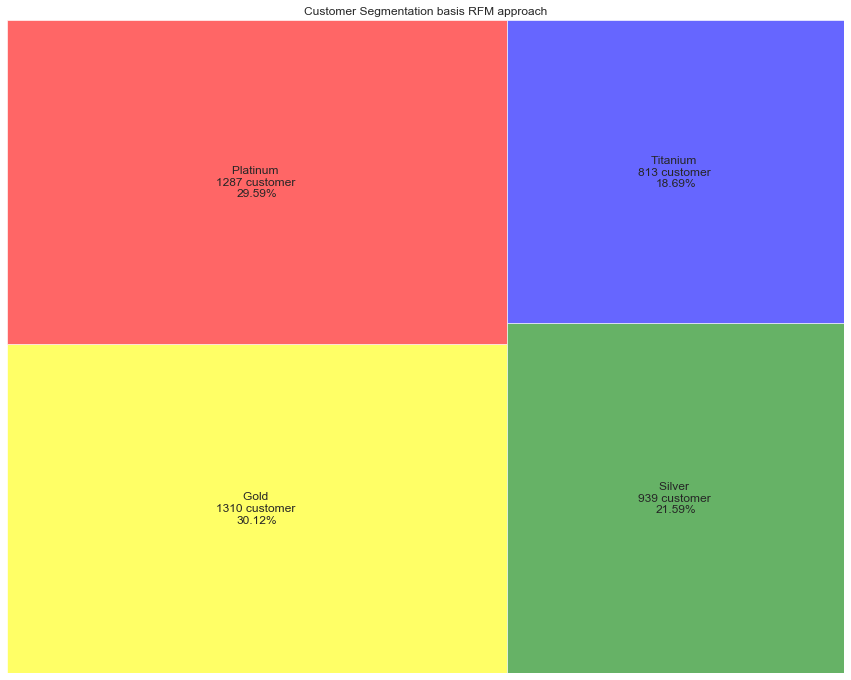

In [55]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(15,12)
colors_dics = {'Gold':'yellow', 'Platinum':'red', 'Silver':'green', 'Titanium':'blue'}
squarify.plot(sizes=final_report_1['NumBuyers'],color=colors_dics.values(),
             label=['{} \n{:.0f} customer \n{}%'.format(*final_report_1.iloc[i])
                   for i in range(0, len(final_report_1))], alpha=0.6)

plt.title("Customer Segmentation basis RFM approach")
plt.axis('off')
plt.show()

# Building Cluster Model

In [56]:
RFMScore1 = RFMScore.copy()

In [57]:
RFMScore1.head()

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFMGroup,RFMsum,Loyality_Level
0,2.0,4,182,553704.0,1,1,1,111,3,Gold
1,3.0,77,27,257404.0,4,3,1,431,8,Platinum
2,4.0,20,72,176613.0,3,2,2,322,7,Platinum
3,5.0,18,16,41976.0,2,4,3,243,9,Silver
4,6.0,9,84,151822.0,1,2,2,122,5,Gold


In [58]:
RFMScore1 = RFMScore1.iloc[:,1:4]

In [59]:
RFMScore1.head()

,Recency,Frequency,Monetory
0,4,182,553704.0
1,77,27,257404.0
2,20,72,176613.0
3,18,16,41976.0
4,9,84,151822.0


In [60]:
RFMScore1.shape

(4349, 3)

In [61]:
# Feature scaling required since we are using euclidean distance
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_data = sc.fit_transform(RFMScore1)
sc_data

array([[-0.64079551,  0.38379456,  0.3777193 ],
       [ 0.17351282, -0.28413542,  0.03204302],
       [-0.46231697, -0.09022026, -0.06221123],
       ...,
       [-0.55155624, -0.34446458, -0.23913379],
       [-0.64079551,  2.84867167,  0.0591138 ],
       [-0.1165148 , -0.09883872,  0.03836156]])

In [62]:
sc_data = pd.DataFrame(sc_data, index = RFMScore1.index, columns = RFMScore1.columns)

In [63]:
sc_data

,Recency,Frequency,Monetory
0,-0.640796,0.383795,0.377719
1,0.173513,-0.284135,0.032043
2,-0.462317,-0.090220,-0.062211
3,-0.484627,-0.331537,-0.219285
4,-0.585021,-0.038510,-0.091133
...,...,...,...
4344,-0.495782,-0.357392,-0.244363
4345,1.333623,-0.370320,-0.255686
4346,-0.551556,-0.344465,-0.239134
4347,-0.640796,2.848672,0.059114


In [64]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1,20):
    kmeans = KMeans(n_clusters=i, init='k-means++',max_iter=1000,random_state=101)
    kmeans.fit(sc_data)
    wcss.append(kmeans.inertia_)

In [65]:
wcss

[13047.000000000005,
 9013.070458558639,
 5554.762804279888,
 4352.874044718689,
 3389.0355253753505,
 2480.4220700705882,
 1975.0286299101126,
 1704.4738635516564,
 1509.527630755899,
 1343.912218696979,
 1127.841503804719,
 994.9402546320955,
 865.2725252410025,
 767.124694341703,
 683.7038894345573,
 606.9909679637617,
 548.0793967647696,
 508.9244542162593,
 469.96927341657204]

In [66]:
abc = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]

In [67]:
abc

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

<AxesSubplot:>

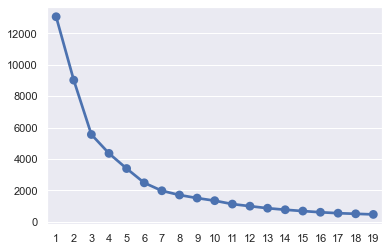

In [68]:
sns.pointplot(abc, wcss)

In [69]:
# k = 3, 6, 7

In [70]:
kmeans = KMeans(n_clusters=7, init='k-means++',max_iter=1000,random_state=101)
y_kmeans = kmeans.fit(sc_data)
y_kmeans

KMeans(max_iter=1000, n_clusters=7, random_state=101)

In [71]:
RFMScore1['Cluster'] = kmeans.labels_

In [72]:
RFMScore1

,Recency,Frequency,Monetory,Cluster
0,4,182,553704.0,0
1,77,27,257404.0,6
2,20,72,176613.0,0
3,18,16,41976.0,0
4,9,84,151822.0,0
...,...,...,...,...
4344,17,10,20480.0,0
4345,181,7,10774.0,6
4346,12,13,24962.0,0
4347,4,754,280608.0,2


In [77]:
RFMScore1['CustomerID'] = dataset['CustomerID']

In [78]:
RFMScore1.to_csv("cluster.csv")

In [79]:
dataset.head()

,CustomerID,Invoice No,Date,Price
0,4355.0,398177.0,2017-10-29,1926.0
1,4352.0,394422.0,2017-05-10,1740.0
2,4352.0,394422.0,2017-12-10,1866.0
3,4352.0,388633.0,2017-08-22,1869.0
4,4352.0,394422.0,2017-10-10,1888.0


In [80]:
final_report1 = RFMScore1.groupby('Cluster')[['Recency','Frequency', 'Monetory','CustomerID']].agg({
    'Recency' : 'mean','Frequency': 'mean', 'Monetory' :'mean','CustomerID': 'nunique'}).reset_index()

In [81]:
final_report1.head()

,Cluster,Recency,Frequency,Monetory,CustomerID
0,0,20.437350,69.795743,1.542303e+05,996
1,1,310.591160,18.933702,3.689198e+04,244
2,2,9.130435,423.506211,9.330329e+05,207
3,3,2.500000,5889.500000,8.363220e+06,4
4,4,3.000000,2053.000000,3.553619e+07,1
